<a href="https://colab.research.google.com/github/maggieliuzzi/reinforcement_learning/blob/master/explore_exploit_dilemma/EpsilonGreedy_Gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function, division  # sudo pip install -U future
from builtins import range
import matplotlib.pyplot as plt
import numpy as np

In [0]:
NUM_TRIALS = 10000
EPS = 0.05  # 0.05, 0.1, 0.01  # higher epsilon converges faster but worst long-run cumulative reward
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [0]:
class Bandit:
  def __init__(self, m):
    # p: the win rate
    self.m = m
    self.m_estimate = 0  # why not 0.5? 0.5 gave better results
    self.N = 0  # number of samples

  def pull(self):
    # draw a 1 with probability p
    return np.random.randn() + self.m  # Gaussian distribution (mean: m, var: 1)  # uniform distribution: np.random.random() < self.p (Bernoulli)  # True ~ 1

  def update(self, x):
    # x can be 0 or 1
    self.N += 1
    self.m_estimate = ((self.N-1)*self.m_estimate + x) / self.N  # Don't forget *(self.N - 1)  # calculating sample mean

In [0]:
bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

rewards = np.zeros(NUM_TRIALS)
num_times_explored = 0
num_times_exploited = 0
num_optimal = 0
optimal_j = np.argmax([b.m for b in bandits])
print("optimal j:", optimal_j)

[b.m_estimate for b in bandits]

optimal j: 2


[0, 0, 0]

In [0]:
for i in range(NUM_TRIALS):

  # use epsilon-greedy to select the next bandit
  # EPS -= EPS / (i+1)  # decaying epsilon # TODO: try others
  if np.random.random() < EPS:  # uniform random number
    num_times_explored += 1
    print("Exploring with epsilon {}: {}".format(EPS, np.random.randint(len(bandits))))
    j = np.random.randint(len(bandits))
  else:
    num_times_exploited += 1
    print("Bandits: E(p): ", [b.m_estimate for b in bandits], ", chosen: ", np.argmax([b.m_estimate for b in bandits]))  # TOTHINK: argmax returns first occurrence if multiple
    j = np.argmax([b.m_estimate for b in bandits])

  if j == optimal_j:
    num_optimal += 1

  # pull the arm for the bandit with the largest sample
  x = bandits[j].pull()

  # update rewards log
  rewards[i] = x

  # update the distribution for the bandit whose arm we just pulled  # estimate for mean reward
  bandits[j].update(x)

Streaming output truncated to the last 5000 lines.
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7327881892225566] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7328314714846758] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7327207294666903] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.732693619550484] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7329455944279419] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7329388960320887] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7328660842930842] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7332647435695222] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7330140372566193] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.5549061715191208, 0.7328107270047497] , chosen:  2
Bandits: E(p):  [0.4185336080603326, 0.55490617151

In [0]:
## Stats
for b in bandits:
  print("mean estimate:", b.m_estimate)  # mean estimates for each bandit
print("total reward earned:", rewards.sum())
print("overall win rate:", rewards.sum() / NUM_TRIALS)
print("num_times_explored:", num_times_explored)
print("num_times_exploited:", num_times_exploited)
print("num times selected optimal bandit:", num_optimal)

mean estimate: 0.35850753440475785
mean estimate: 0.5456569469964841
mean estimate: 0.7479781536853439
total reward earned: 7327.139948820701
overall win rate: 0.7327139948820701
num_times_explored: 500
num_times_exploited: 9500
num times selected optimal bandit: 9388


In [0]:
# expected return with epsilon  # only valid for constant epsilon?
print(EPS, np.max(BANDIT_PROBABILITIES), np.array(BANDIT_PROBABILITIES).sum(), len(BANDIT_PROBABILITIES))
e_return = (1 - EPS) * np.max(BANDIT_PROBABILITIES) + EPS * (np.array(BANDIT_PROBABILITIES).sum() / len(BANDIT_PROBABILITIES))
e_return

0.05 0.75 1.45 3


0.7366666666666666

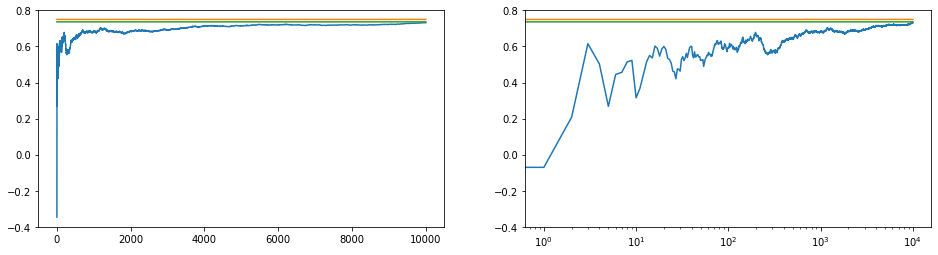

In [0]:
## Plots
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)  # element-wise division  # cumulative win-rate per iteration

plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.plot(win_rates)  # blue
plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))  # orange
plt.plot(np.ones(NUM_TRIALS) * e_return)  # green  # only for constant/non-decaying epsilon
plt.subplot(1,2,2)
plt.plot(win_rates)  # blue
plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))  # orange
plt.plot(np.ones(NUM_TRIALS) * e_return)  # green  # only for constant/non-decaying epsilon
plt.xscale('log')  # since it converges fast
plt.show()